In [10]:
#stvaranje podataka, dodavanje returna i volumena ovisno o dobivenim parametrima

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import math
from IPython import display
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import acorr
from IPython.display import display
import numpy as np
matplotlib.rc('font', size = 12)
matplotlib.rcParams['axes.grid'] = True

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bitstampUSD.csv', names=['Time', 'USD', 'BTC'], delimiter=',', header=0)
print(data)
data = data[7893786:]
data = data.reset_index(drop=True)
columns = data.columns.values

display(data)


data['Time'] = data['Time'].apply(lambda x : pd.Timestamp(x, unit='s' ))
display(data)
#data.to_csv('/content/drive/My Drive/dipl/starting_data.csv', index=False)
#namjestavanje indexa zbog rolling funkcije
data['Time']=pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

data['Test'] = 1
data['Kolicina'] = data.USD*data.BTC
print(data)

In [ ]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None

def calculateData1T():
  data1T = pd.DataFrame({'Open': data['USD'].resample('1T').first()})
  data1T['High'] = data['USD'].resample('1T').max()
  data1T['Low'] = data['USD'].resample('1T').min()
  data1T['Close'] = data['USD'].resample('1T').last()
  data1T['Volume'] = data['Kolicina'].resample('1T').sum()
  data1T['NumberOfTrades'] = data['Test'].resample('1T').sum()
  data1T['VWAP'] = data1T.Volume/data['BTC'].resample('1T').sum()

  data1T['Spread'] = data1T.High - data1T.Low
  data1T = data1T.interpolate(method='pad')
  data1T['ReturnCO'] = (data1T.Close - data1T.Open) / data1T.Open

  #izracuna returna close cijena
  returnCC = []
  for i, price in enumerate(data1T['Close']):
    if i == 0:
      returnCC.append(1)
    else:
      returnCC.append((data1T['Close'][i] - data1T['Close'][i-1]) / data1T['Close'][i-1])
  data1T['ReturnCC'] = returnCC

  #izracuna returna vwap cijena
  returnVW = []
  for i, price in enumerate(data1T['VWAP']):
    if i == 0:
      returnVW.append(1)
    else:
      returnVW.append((data1T['VWAP'][i] - data1T['VWAP'][i-1]) / data1T['VWAP'][i-1])
  data1T['ReturnVW'] = returnVW
  data1T['Volatility'] = data['USD'].resample('1T').std()
  data1T = data1T.interpolate(method='pad')

  #dodavanje volatility10 za binarne izlaze volatilnosti 1 - visoka ili 0 - niska
  boundary = data1T['Volatility'].median()
  volatility10 = []
  for i, volatility in enumerate(data1T['Volatility']):
    if (data1T['Volatility'][i] > boundary):
      volatility10.append("1")
    else: 
      volatility10.append("0")
  data1T['Volatility10'] = volatility10
  #data1T.dropna(subset=['Volatility'], inplace=True)
  #data1T = data1T.reset_index(drop = True)
  data1T.to_csv('/content/drive/My Drive/dipl/data1T.csv', index=False)
  print(data1T)

calculateData1T()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


                        Open     High      Low    Close         Volume  \
Time                                                                     
2015-11-04 21:03:00   463.00   463.00   460.55   460.55   12019.624607   
2015-11-04 21:04:00   460.40   460.40   452.00   453.20  185027.749593   
2015-11-04 21:05:00   453.20   455.60   450.00   450.00  102007.271835   
2015-11-04 21:06:00   453.97   453.98   450.00   451.11   18008.751992   
2015-11-04 21:07:00   452.93   456.53   452.83   456.53   75054.379497   
...                      ...      ...      ...      ...            ...   
2020-03-24 11:10:00  6674.74  6686.00  6665.84  6681.53   14330.817397   
2020-03-24 11:11:00  6679.20  6698.46  6676.93  6676.93  142639.223531   
2020-03-24 11:12:00  6687.51  6692.52  6681.22  6685.48    8719.574505   
2020-03-24 11:13:00  6683.74  6688.71  6676.88  6681.99   53265.957363   
2020-03-24 11:14:00  6673.79  6679.89  6673.00  6679.89   11040.716539   

                     NumberOfTrades  

In [ ]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None

def calculateData5T():
  data5T = pd.DataFrame({'Open': data['USD'].resample('5T').first()})
  data5T['btcsum'] = data['BTC'].resample('5T').sum()
  data5T['High'] = data['USD'].resample('5T').max()
  data5T['Low'] = data['USD'].resample('5T').min()
  data5T['Close'] = data['USD'].resample('5T').last()
  data5T['Volume'] = data['Kolicina'].resample('5T').sum()
  data5T['NumberOfTrades'] = data['Test'].resample('5T').sum()
  data5T['VWAP'] = data5T.Volume/data['BTC'].resample('5T').sum()
  data5T['Spread'] = data5T.High - data5T.Low
  data5T = data5T.interpolate(method='pad')
  data5T['ReturnCO'] = (data5T.Close - data5T.Open) / data5T.Open

  #izracuna returna close cijena
  returnCC = []
  for i, price in enumerate(data5T['Close']):
    if i == 0:
      returnCC.append(1)
    else:
      returnCC.append((data5T['Close'][i] - data5T['Close'][i-1]) / data5T['Close'][i-1])
  data5T['ReturnCC'] = returnCC

  #izracuna returna vwap cijena
  returnVW = []
  for i, price in enumerate(data5T['VWAP']):
    if i == 0:
      returnVW.append(1)
    else:
      returnVW.append((data5T['VWAP'][i] - data5T['VWAP'][i-1]) / data5T['VWAP'][i-1])
  data5T['ReturnVW'] = returnVW
  data5T['Volatility'] = data['USD'].resample('5T').std()
  data5T = data5T.interpolate(method='pad')

  #dodavanje volatility10 za binarne izlaze volatilnosti 1 - visoka ili 0 - niska
  boundary = data5T['Volatility'].median()
  volatility10 = []
  for i, volatility in enumerate(data5T['Volatility']):
    if (data5T['Volatility'][i] > boundary):
      volatility10.append("1")
    else: 
      volatility10.append("0")
  data5T['Volatility10'] = volatility10

  data5T['Time'] = data5T.index
  temp = data5T['Time']
  data5T.drop(labels=['Time'], axis=1,inplace = True)
  data5T.insert(0, 'Time', temp)

  #data5T.dropna(subset=['Volatility'], inplace=True)
  #data5T = data5T.reset_index(drop = True)
  data5T.to_csv('/content/drive/My Drive/dipl/data5T.csv', index=False)
  print(data5T)

calculateData5T()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


                                   Time     Open      btcsum     High  \
Time                                                                    
2015-11-04 21:00:00 2015-11-04 21:00:00   463.00  430.942837   463.00   
2015-11-04 21:05:00 2015-11-04 21:05:00   453.20  746.312087   459.11   
2015-11-04 21:10:00 2015-11-04 21:10:00   459.00  434.419496   461.94   
2015-11-04 21:15:00 2015-11-04 21:15:00   455.87  253.826510   457.33   
2015-11-04 21:20:00 2015-11-04 21:20:00   450.48  530.419299   453.67   
...                                 ...      ...         ...      ...   
2020-03-24 10:50:00 2020-03-24 10:50:00  6721.61   19.387352  6756.91   
2020-03-24 10:55:00 2020-03-24 10:55:00  6755.90   37.069981  6755.90   
2020-03-24 11:00:00 2020-03-24 11:00:00  6745.17   78.721210  6745.54   
2020-03-24 11:05:00 2020-03-24 11:05:00  6716.37  132.791178  6725.00   
2020-03-24 11:10:00 2020-03-24 11:10:00  6674.74   34.411613  6698.46   

                         Low    Close         Volu

In [ ]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None

def calculateData10T():
  data10T = pd.DataFrame({'Open': data['USD'].resample('10T').first()})
  data10T['High'] = data['USD'].resample('10T').max()
  data10T['Low'] = data['USD'].resample('10T').min()
  data10T['Close'] = data['USD'].resample('10T').last()
  data10T['Volume'] = data['Kolicina'].resample('10T').sum()
  data10T['NumberOfTrades'] = data['Test'].resample('10T').sum()
  data10T['VWAP'] = data10T.Volume/data['BTC'].resample('10T').sum()
  data10T['Spread'] = data10T.High - data10T.Low
  data10T = data10T.interpolate(method='pad')
  data10T['ReturnCO'] = (data10T.Close - data10T.Open) / data10T.Open

  #izracuna returna close cijena
  returnCC = []
  for i, price in enumerate(data10T['Close']):
    if i == 0:
      returnCC.append(1)
    else:
      returnCC.append((data10T['Close'][i] - data10T['Close'][i-1]) / data10T['Close'][i-1])
  data10T['ReturnCC'] = returnCC

  #izracuna returna vwap cijena
  returnVW = []
  for i, price in enumerate(data10T['VWAP']):
    if i == 0:
      returnVW.append(1)
    else:
      returnVW.append((data10T['VWAP'][i] - data10T['VWAP'][i-1]) / data10T['VWAP'][i-1])
  data10T['ReturnVW'] = returnVW
  data10T['Volatility'] = data['USD'].resample('10T').std()
  data10T = data10T.interpolate(method='pad')

  #dodavanje volatility10 za binarne izlaze volatilnosti 1 - visoka ili 0 - niska
  boundary = data10T['Volatility'].median()
  volatility10 = []
  for i, volatility in enumerate(data10T['Volatility']):
    if (data10T['Volatility'][i] > boundary):
      volatility10.append("1")
    else: 
      volatility10.append("0")
  data10T['Volatility10'] = volatility10

  data10T['Time'] = data10T.index
  temp = data10T['Time']
  data10T.drop(labels=['Time'], axis=1,inplace = True)
  data10T.insert(0, 'Time', temp)
  #data10T.dropna(subset=['Volatility'], inplace=True)
  #data10T = data10T[data10T['Volatility'].notna()]
  #data10T = data10T.reset_index(drop = True)
  data10T.to_csv('/content/drive/My Drive/dipl/data10T.csv', index=False)
  print(data10T)

calculateData10T()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


                                   Time     Open     High      Low    Close  \
Time                                                                          
2015-11-04 21:00:00 2015-11-04 21:00:00   463.00   463.00   450.00   458.94   
2015-11-04 21:10:00 2015-11-04 21:10:00   459.00   461.94   450.00   454.04   
2015-11-04 21:20:00 2015-11-04 21:20:00   450.48   453.67   446.81   450.00   
2015-11-04 21:30:00 2015-11-04 21:30:00   450.00   454.00   442.18   442.47   
2015-11-04 21:40:00 2015-11-04 21:40:00   442.47   443.00   412.00   412.00   
...                                 ...      ...      ...      ...      ...   
2020-03-24 10:30:00 2020-03-24 10:30:00  6784.16  6788.52  6706.81  6726.55   
2020-03-24 10:40:00 2020-03-24 10:40:00  6717.89  6750.54  6708.23  6723.26   
2020-03-24 10:50:00 2020-03-24 10:50:00  6721.61  6756.91  6712.64  6749.26   
2020-03-24 11:00:00 2020-03-24 11:00:00  6745.17  6745.54  6655.20  6679.22   
2020-03-24 11:10:00 2020-03-24 11:10:00  6674.74  66

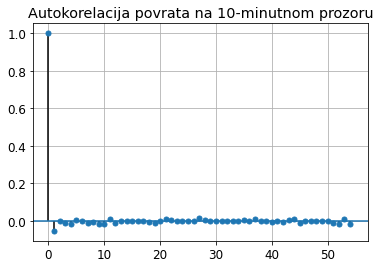

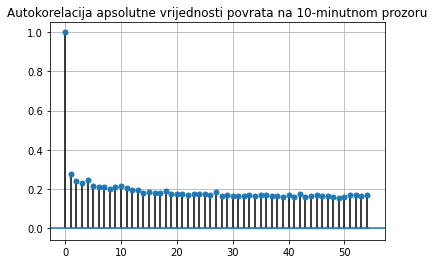

In [11]:
#autokorelacija returnova
data1T = pd.read_csv('/content/drive/My Drive/dipl/data1T.csv', delimiter=',', header=0)
data5T = pd.read_csv('/content/drive/My Drive/dipl/data5T.csv', delimiter=',', header=0)
data10T = pd.read_csv('/content/drive/My Drive/dipl/data10T.csv', delimiter=',', header=0)
autocorr = pd.DataFrame({'Return1T': data1T['ReturnCC'], 'ReturnAbs' : abs(data1T['ReturnCC'])})
autocorr2 = pd.DataFrame({'Return5T': data5T['ReturnCC'], 'ReturnAbs' : abs(data5T['ReturnCC'])})
autocorr3 = pd.DataFrame({'Return10T': data10T['ReturnCC'], 'ReturnAbs' : abs(data10T['ReturnCC'])})

autocorr = autocorr.fillna(0)
autocorr2 = autocorr2.fillna(0)
autocorr3 = autocorr3.fillna(0)

print(autocorr)
print(autocorr2)
print(autocorr3)
"""
fig, axs = plt.subplots(3, 2)
plt.figure(figsize=(30,16))
#fig.suptitle('Autokorelacija returnova za 10 minutni window')
axs[0, 0].set_title('Autokorelacija Returna na 1 minutnom prozoru') 
axs[0, 0].acorr(autocorr['Return1T'], lags=4320)
axs[0, 1].set_title('Autokorelacija ReturnAbs na 1 minutnom prozoru') 
axs[0, 1].acorr(autocorr['ReturnAbs'], lags=4320)

axs[1, 0].set_title('Autokorelacija Returna na 5 minutnom prozoru') 
axs[1, 0].acorr(autocorr2['Return5T'], lags=864)
axs[1, 1].set_title('Autokorelacija ReturnAbs na 5 minutnom prozoru') 
axs[1, 1].acorr(autocorr2['ReturnAbs'], lags=864)

axs[2, 0].set_title('Autokorelacija Returna na 10 minutnom prozoru') 
axs[2, 0].acorr(autocorr3['Return10T'], maxlags=172)
axs[2, 1].set_title('Autokorelacija ReturnAbs na 10 minutnom prozoru') 
axs[2, 1].acorr(autocorr3['ReturnAbs'], maxlags=172)


plot_acf(autocorr3['Return10T'], lags=172, figsize=(30,16))

plot_acf(autocorr3['ReturnAbs'], lags=172, figsize=(30,16))

plt.figure(figsize=(30,16))
autocorrelation_plot(autocorr3['Return10T'], lags=172)
plt.show()
plt.figure(figsize=(30,16))
autocorrelation_plot(autocorr3['ReturnAbs'], lags=172)
plt.show()
"""
plt.figure(figsize=(30,16))
plt.title('Autokorelacija Returna na 10 minutnom prozoru')

plot_acf(autocorr3['Return10T'], title='Autokorelacija povrata na 10-minutnom prozoru')
plt.savefig('/content/drive/My Drive/dipl/4.svg')

matplotlib.rc('font', size = 10)
plot_acf(autocorr3['ReturnAbs'], title='Autokorelacija apsolutne vrijednosti povrata na 10-minutnom prozoru')
plt.savefig('/content/drive/My Drive/dipl/5.svg') 

In [ ]:
dataT = pd.read_csv('/content/drive/My Drive/dipl/data10T.csv', delimiter=',', header=0)

boundary = dataT['Volatility'].median()
print(boundary)
volatility10 = []
cnt = 0
for i, volatility in enumerate(dataT['Volatility']):
  if (pd.isnull(dataT['Volatility'][i])):
    print(dataT['Close'][i], dataT['Volatility'][i])
    cnt+=1
  if (dataT['Volatility'][i] > boundary):
    volatility10.append("1")
  else: 
    volatility10.append("0")
dataT['Volatility10'] = volatility10

print(dataT)
print('ajme')
print(cnt)

br1 = 0
br0 = 0
for i, volatility in enumerate(dataT['Volatility10']):
    #print(type(dataT['Volatility10'][i]))
    if(int(dataT['Volatility10'][i]) == 1):
      #print(dataT['Volatility10'][i])
      br1+=1
    else: 
      br0+=1

print(br1, br0)
print(dataT)

3.1787235892960854
                       Time     Open     High      Low    Close        Volume  \
0       2015-11-04 21:00:00   463.00   463.00   450.00   458.94  5.361838e+05   
1       2015-11-04 21:10:00   459.00   461.94   450.00   454.04  3.132414e+05   
2       2015-11-04 21:20:00   450.48   453.67   446.81   450.00  3.741168e+05   
3       2015-11-04 21:30:00   450.00   454.00   442.18   442.47  3.316574e+05   
4       2015-11-04 21:40:00   442.47   443.00   412.00   412.00  1.438933e+06   
...                     ...      ...      ...      ...      ...           ...   
230625  2020-03-24 10:30:00  6784.16  6788.52  6706.81  6726.55  7.740191e+05   
230626  2020-03-24 10:40:00  6717.89  6750.54  6708.23  6723.26  1.807197e+05   
230627  2020-03-24 10:50:00  6721.61  6756.91  6712.64  6749.26  3.804674e+05   
230628  2020-03-24 11:00:00  6745.17  6745.54  6655.20  6679.22  1.415753e+06   
230629  2020-03-24 11:10:00  6674.74  6698.46  6665.84  6679.89  2.299963e+05   

        

In [ ]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None
data1 = pd.read_csv('/content/drive/My Drive/dipl/data5T.csv', delimiter=',', header=0)
data2 = pd.read_csv('/content/drive/My Drive/dipl/data10T.csv', delimiter=',', header=0)

"""
helper = pd.DataFrame(index=data10T)
#helper.set_index('Time', inplace=True)
#helper['Time']=helper['Time'].resample('10T')
#helper['Time'].resample('10T')
print(helper)
"""
#print(data)
print(len(data1))
#btc = pd.DataFrame({'btcsum': data['BTC'].resample('5T').sum()})
#std = pd.DataFrame({'std': data['USD'].resample('5T').sum()})
#btc = btc.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=['btcsum'])
#print(btc)
#print(len(btc))
#btc = btc.set_index(data1.index)
#data1['btcsum'] = btc['btcsum']
#data1 = data1.fillna(0)
#data2 = data2.fillna(0)
print(data1)
print(data2)

target = pd.DataFrame({'Time': data2['Time'], 'Volatility': data2['Volatility'], 'Volatility10': data2['Volatility10']})
target = target.iloc[3:]
target = target.reset_index(drop=True)
target.to_csv('/content/drive/My Drive/dipl/target.csv', index=False)
data1.drop(data1.tail(5).index, inplace=True)
print(target)
#print(data1)
print(len(data1))
print(len(target))
#final = pd.DataFrame(columns=['Time', 'btcsum', 'Open', 'High', 'Low', 'Close', 'Volume', 'NumberOfTrades', 'VWAP', 'Spread', 'ReturnCO'])
#final['Time'] = target['Time']
#final.set_index(target.index)
cols = ['Time', 'btcsum', 'Open', 'High', 'Low', 'Close', 'Volume', 'NumberOfTrades', 'VWAP', 'Spread', 'Spread30', 'Spread10',  'Spread5', 'Volatility30', 'Volatility10', 'Volatility5', 'ReturnCO', 'ReturnCC5', 'ReturnCC10']
# ---- 
dat = []
for i in range(0, len(data1)-1, 2):
  Xtemp = data1.iloc[i:i+6]
  if(i<=461250):
    #final.loc[i] = pd.Series({'btcsum': Xtemp['btcsum'], 'Open': Xtemp['Open'].iloc[0], 'High': Xtemp['High'].max(), 'Low': Xtemp['Low'].min(), 'Close': Xtemp['Close'].iloc[-1], 'Volume': Xtemp['Volume'].sum(), 'NumberOfTrades': Xtemp['NumberOfTrades'].sum(), 'VWAP': Xtemp['Volume']/Xtemp['btcsum'], 'Spread': Xtemp['High']-Xtemp['Low'], 'ReturnCO': (Xtemp['Close']-Xtemp['Open'])/Xtemp['Open']})
    dat.append([Xtemp['Time'].iloc[0], Xtemp['btcsum'].sum(), Xtemp['Open'].iloc[0], Xtemp['High'].max(), Xtemp['Low'].min(), Xtemp['Close'].iloc[-1], Xtemp['Volume'].sum(), Xtemp['NumberOfTrades'].sum(), Xtemp['Volume'].sum()/Xtemp['btcsum'].sum(), Xtemp['High'].max()-Xtemp['Low'].min(), Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[0], Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[-3], Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[-2], Xtemp['Volatility'].std(), Xtemp['Volatility'][-2:-1].std(), Xtemp['Volatility'].iloc[-1], (Xtemp['Close'].iloc[-1]-Xtemp['Open'].iloc[0])/Xtemp['Open'].iloc[0], (Xtemp['Close'].iloc[-1]-Xtemp['Close'].iloc[-2])/Xtemp['Close'].iloc[-2], (Xtemp['Close'].iloc[-1]-Xtemp['Close'].iloc[-3])/Xtemp['Close'].iloc[-3]])
    #print(i, Xtemp['Low'].iloc[2], Xtemp['Low'].iloc[1], Xtemp['Low'].iloc[0], len(Xtemp))
  else:
    dat.append([Xtemp['Time'].iloc[0], Xtemp['btcsum'].sum(), Xtemp['Open'].iloc[0], Xtemp['High'].max(), Xtemp['Low'].min(), Xtemp['Close'].iloc[-1], Xtemp['Volume'].sum(), Xtemp['NumberOfTrades'].sum(), Xtemp['Volume'].sum()/Xtemp['btcsum'].sum(), Xtemp['High'].max()-Xtemp['Low'].min(), Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[0], Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[0], Xtemp['High'].iloc[-1]-Xtemp['Low'].iloc[0], Xtemp['Volatility'].std(), Xtemp['Volatility'].iloc[-1], Xtemp['Volatility'].iloc[-1], (Xtemp['Close'].iloc[-1]-Xtemp['Open'].iloc[0])/Xtemp['Open'].iloc[0], (Xtemp['Close'].iloc[-1]-Xtemp['Close'].iloc[0])/Xtemp['Close'].iloc[0], (Xtemp['Close'].iloc[-1]-Xtemp['Close'].iloc[0])/Xtemp['Close'].iloc[0]])

  """
  final['Open'] = Xtemp['Open'].iloc[0]
  final['High'] = Xtemp['High'].max()
  final['Low'] = Xtemp['Low'].min()
  final['Close'] = Xtemp['Close'].iloc[-1]
  final['Volume'] = Xtemp['Volume'].sum()
  """
final = pd.DataFrame(dat, columns=cols)
returnCC = []
for i, price in enumerate(final['Close']):
  if i == 0:
    returnCC.append(final['Close'][i])
  else:
    returnCC.append((final['Close'][i] - final['Close'][i-1]) / final['Close'][i-1])
final['ReturnCC'] = returnCC
returnVW = []
for i, price in enumerate(final['VWAP']):
  if i == 0:
    returnVW.append(final['VWAP'][i])
  else:
    returnVW.append((final['VWAP'][i] - final['VWAP'][i-1]) / final['VWAP'][i-1])
final['ReturnVW'] = returnVW
#dodavanje novih featurea -> medjusobnih omjera
oldClose = final['Close']
oldSpread = final['Spread']
final['Close'] = final['Close']/final['VWAP']
final['Spread'] = final['Spread']/oldClose 
final['VWAP'] = final['VWAP']/oldSpread  
#final.rename(columns={'Close': 'Close/VWAP', 'Spread': 'Spread/Close', 'VWAP': 'VWAP/Close'})
final.columns = ['Time', 'btcsum', 'Open', 'High', 'Low', 'Close/VWAP', 'Volume', 'NumberOfTrades', 'VWAP/Close', 'Spread/Close', 'Spread30', 'Spread10',  'Spread5', 'Volatility30', 'Volatility10', 'Volatility5', 'ReturnCO', 'ReturnCC5', 'ReturnCC10', 'ReturnCC', 'ReturnVW']
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final = final.fillna(0)
print(len(final))
print(len(target))
print(final)
#display(final)

#print(final['High'])
final.drop(columns=['btcsum'])
final.to_csv('/content/drive/My Drive/dipl/final.csv', index=False)

461259
                       Time     Open      btcsum     High      Low    Close  \
0       2015-11-04 21:00:00   463.00  430.942837   463.00   452.00   453.20   
1       2015-11-04 21:05:00   453.20  746.312087   459.11   450.00   458.94   
2       2015-11-04 21:10:00   459.00  434.419496   461.94   454.09   455.86   
3       2015-11-04 21:15:00   455.87  253.826510   457.33   450.00   454.04   
4       2015-11-04 21:20:00   450.48  530.419299   453.67   446.81   451.88   
...                     ...      ...         ...      ...      ...      ...   
461254  2020-03-24 10:50:00  6721.61   19.387352  6756.91  6712.64  6756.91   
461255  2020-03-24 10:55:00  6755.90   37.069981  6755.90  6733.16  6749.26   
461256  2020-03-24 11:00:00  6745.17   78.721210  6745.54  6701.75  6720.82   
461257  2020-03-24 11:05:00  6716.37  132.791178  6725.00  6655.20  6679.22   
461258  2020-03-24 11:10:00  6674.74   34.411613  6698.46  6665.84  6679.89   

               Volume  NumberOfTrades       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in double_scalars


230627
230627
                       Time       btcsum     Open     High      Low  \
0       2015-11-04 21:00:00  2697.112877   463.00   463.00   446.81   
1       2015-11-04 21:10:00  2261.119366   459.00   461.94   442.18   
2       2015-11-04 21:20:00  4938.768967   450.48   454.00   412.00   
3       2015-11-04 21:30:00  7651.390333   450.00   454.00   402.82   
4       2015-11-04 21:40:00  8648.642875   442.47   443.00   402.82   
...                     ...          ...      ...      ...      ...   
230622  2020-03-24 10:00:00   405.053979  6792.03  6837.46  6701.75   
230623  2020-03-24 10:10:00   427.713537  6777.00  6794.21  6701.75   
230624  2020-03-24 10:20:00   228.318410  6745.90  6794.21  6706.81   
230625  2020-03-24 10:30:00   141.743103  6784.16  6788.52  6706.81   
230626  2020-03-24 10:40:00    26.840331  6717.89  6750.54  6708.23   

        Close/VWAP        Volume  NumberOfTrades  VWAP/Close  Spread/Close  \
0         0.991957  1.223542e+06            1075   27.7

In [ ]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = None
data1 = pd.read_csv('/content/drive/My Drive/dipl/data5T.csv', delimiter=',', header=0)
data2 = pd.read_csv('/content/drive/My Drive/dipl/data10T.csv', delimiter=',', header=0)
targetReturn = pd.DataFrame({'Time': data2['Time'], 'Return' : data2['ReturnCC']})
targetReturn = targetReturn.iloc[3:]
targetReturn = targetReturn.reset_index(drop=True)
targetReturn.replace([np.inf, -np.inf], np.nan, inplace=True)
targetReturn = targetReturn.fillna(0)

boundary = abs(targetReturn['Return']).median()-0.0006
Return10 = []
for i, Return in enumerate(targetReturn['Return']):
  if (targetReturn['Return'][i] > boundary):
    Return10.append("1")
  elif(targetReturn['Return'][i] < -boundary): 
    Return10.append("-1")
  else :
    Return10.append("0")
targetReturn['Return10'] = Return10

print(targetReturn)
targetReturn['Return10'].value_counts()
print(boundary)
targetReturn.to_csv('/content/drive/My Drive/dipl/targetReturn.csv', index=False)


1     81044
-1    77185
0     72398
Name: Return10, dtype: int64

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
